In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("C:/Users/This PC/Desktop/training/trainingtask1/bottle.csv")
print(df.shape)
df.head()

(864863, 74)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Exclude non-numeric columns from the correlation analysis
num_df = df.select_dtypes(include='number')
num_df

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
0,1,1,0,10.500,33.4400,NaN,25.64900,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,8,10.460,33.4400,NaN,25.65600,NaN,NaN,NaN,...,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,10,10.460,33.4370,NaN,25.65400,NaN,NaN,NaN,...,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,19,10.450,33.4200,NaN,25.64300,NaN,NaN,NaN,...,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,20,10.450,33.4210,NaN,25.64300,NaN,NaN,NaN,...,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,0,18.744,33.4083,5.805,23.87055,108.74,253.47,NaN,...,0.91,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,2,18.744,33.4083,5.805,23.87072,108.74,253.47,4.0,...,0.91,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,5,18.692,33.4150,5.796,23.88911,108.46,253.06,3.0,...,0.92,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,10,18.161,33.4062,5.816,24.01426,107.74,253.92,2.0,...,1.08,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
correlation_matrix = num_df.corr()
correlation_with_target = correlation_matrix['Salnty']
correlation_with_target

Cst_Cnt   -0.198024
Btl_Cnt   -0.195207
Depthm     0.572630
T_degC    -0.505266
Salnty     1.000000
             ...   
DIC2       0.955942
TA1        0.895124
TA2        0.937147
pH2        0.583807
pH1        0.106417
Name: Salnty, Length: 70, dtype: float64

In [5]:
# Select features with a correlation threshold
correlation_threshold = 0.5  # You can adjust this threshold
selected_features = correlation_with_target[abs(correlation_with_target) > correlation_threshold].index
df_selected = df[selected_features]
df_selected

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,PO4uM,SiO3uM,...,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_PRES,DIC1,DIC2,TA1,TA2,pH2
0,0,10.500,33.4400,NaN,25.64900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,8,10.460,33.4400,NaN,25.65600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN
2,10,10.460,33.4370,NaN,25.65400,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN
3,19,10.450,33.4200,NaN,25.64300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
4,20,10.450,33.4210,NaN,25.64300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,0,18.744,33.4083,5.805,23.87055,108.74,253.47,NaN,0.22,1.77,...,108.7,1.8,0.22,0.1,0,NaN,NaN,NaN,NaN,NaN
864859,2,18.744,33.4083,5.805,23.87072,108.74,253.47,4.0,0.22,1.77,...,108.7,1.8,0.22,0.1,2,NaN,NaN,NaN,NaN,NaN
864860,5,18.692,33.4150,5.796,23.88911,108.46,253.06,3.0,0.20,1.75,...,108.5,1.8,0.20,0.1,5,NaN,NaN,NaN,NaN,NaN
864861,10,18.161,33.4062,5.816,24.01426,107.74,253.92,2.0,0.25,1.99,...,107.7,2.0,0.25,0.1,10,NaN,NaN,NaN,NaN,NaN


In [6]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Depthm       864863 non-null  int64  
 1   T_degC       853900 non-null  float64
 2   Salnty       817509 non-null  float64
 3   O2ml_L       696201 non-null  float64
 4   STheta       812174 non-null  float64
 5   O2Sat        661274 non-null  float64
 6   Oxy_µmol/Kg  661268 non-null  float64
 7   BtlNum       118667 non-null  float64
 8   PO4uM        413317 non-null  float64
 9   SiO3uM       354091 non-null  float64
 10  NO3uM        337403 non-null  float64
 11  R_Depth      864863 non-null  float64
 12  R_TEMP       853900 non-null  float64
 13  R_POTEMP     818816 non-null  float64
 14  R_SALINITY   817509 non-null  float64
 15  R_SIGMA      812007 non-null  float64
 16  R_SVA        812092 non-null  float64
 17  R_DYNHT      818206 non-null  float64
 18  R_O2         696201 non-

In [7]:
# missing_sum = df_selected.isna().sum()
# missing_prop = df_selected.isna().mean()
# missing_threshold = 0.5
# # Get the list of columns to drop
# columns_to_drop = missing_prop[missing_prop > missing_threshold].index
# columns_to_drop

In [8]:
# df_cleaned = num_df.drop(columns=columns_to_drop)
# df_cleaned

In [9]:
# pd.set_option('display.max_columns', 58)
# df_cleaned.head()

In [10]:
correlation_matrix = df_selected.corr()
correlation_matrix

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,PO4uM,SiO3uM,...,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_PRES,DIC1,DIC2,TA1,TA2,pH2
Depthm,1.000000,-0.681201,0.572630,-0.592399,0.582710,-0.595547,-0.589175,-0.681935,0.667351,0.846583,...,-0.596687,0.846587,0.667357,0.687878,0.999994,0.567855,0.572374,0.786873,0.866185,0.223304
T_degC,-0.681201,1.000000,-0.505266,0.795700,-0.829155,0.850596,0.795543,0.750413,-0.904177,-0.840342,...,0.850365,-0.840343,-0.904179,-0.925476,-0.679852,-0.936239,-0.949972,-0.742196,-0.889635,0.547436
Salnty,0.572630,-0.505266,1.000000,-0.823870,0.603470,-0.790231,-0.824338,-0.693341,0.825373,0.795998,...,-0.790542,0.796000,0.825378,0.849227,0.571405,0.938153,0.955942,0.895124,0.937147,0.583807
O2ml_L,-0.592399,0.795700,-0.823870,1.000000,-0.889568,0.993217,0.999999,0.744968,-0.973389,-0.894005,...,0.993216,-0.894007,-0.973389,-0.969970,-0.590598,-0.977188,-0.941214,-0.802493,-0.726460,0.174204
STheta,0.582710,-0.829155,0.603470,-0.889568,1.000000,-0.876899,-0.890043,-0.378342,0.948210,0.864654,...,-0.929107,0.864652,0.948210,0.958110,0.581409,0.964594,0.965546,0.779899,0.887778,-0.480397
O2Sat,-0.595547,0.850596,-0.790231,0.993217,-0.876899,1.000000,0.993343,0.755972,-0.984222,-0.890058,...,0.999999,-0.890059,-0.984223,-0.983084,-0.593737,-0.985445,-0.962977,-0.788291,-0.767766,0.732628
Oxy_µmol/Kg,-0.589175,0.795543,-0.824338,0.999999,-0.890043,0.993343,1.000000,0.745210,-0.974888,-0.894686,...,0.993352,-0.894687,-0.974889,-0.970844,-0.587319,-0.977329,-0.941528,-0.802435,-0.727023,0.180058
BtlNum,-0.681935,0.750413,-0.693341,0.744968,-0.378342,0.755972,0.745210,1.000000,-0.764347,-0.744149,...,0.755909,-0.744148,-0.764358,-0.761371,-0.681136,-0.888061,-0.958549,-0.737828,-0.828905,-0.457365
PO4uM,0.667351,-0.904177,0.825373,-0.973389,0.948210,-0.984222,-0.974888,-0.764347,1.000000,0.915252,...,-0.984143,0.915252,1.000000,0.987371,0.665547,0.995253,0.980347,0.827508,0.819231,-0.843087
SiO3uM,0.846583,-0.840342,0.795998,-0.894005,0.864654,-0.890058,-0.894686,-0.744149,0.915252,1.000000,...,-0.890050,1.000000,0.915252,0.912827,0.844771,0.911175,0.901142,0.953625,0.984449,-0.332629


In [11]:
df1 = df_selected[['Depthm','T_degC', 'Salnty']]
df1.head()

,Depthm,T_degC,Salnty
0,0,10.50,33.440
1,8,10.46,33.440
2,10,10.46,33.437
3,19,10.45,33.420
4,20,10.45,33.421


In [12]:
df1.isnull().sum()

Depthm        0
T_degC    10963
Salnty    47354
dtype: int64

In [13]:
df1.dropna(axis=0, inplace=True)

In [14]:
print(df1.shape)

(814247, 3)


In [15]:
df1.isnull().sum()

Depthm    0
T_degC    0
Salnty    0
dtype: int64

In [16]:
print(df1.describe())

              Depthm         T_degC         Salnty
count  814247.000000  814247.000000  814247.000000
mean      221.936839      10.860287      33.841337
std       308.657488       4.224930       0.461636
min         0.000000       1.440000      28.431000
25%        46.000000       7.750000      33.489000
50%       125.000000      10.110000      33.866000
75%       300.000000      13.930000      34.197000
max      5351.000000      31.140000      37.034000


In [17]:
X = df1[['T_degC']].values
y = df1['Salnty'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## scratch linear regression

In [19]:
class LinearRegressionFromScratch:
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0
        X_mean = np.mean(X_train)
        y_mean = np.mean(y_train)

        for i in range(X_train.shape[0]):
            num += (X_train[i] - X_mean) * (y_train[i] - y_mean)
            den += (X_train[i] - X_mean) ** 2

        self.m = num / den
        self.b = y_mean - (self.m * X_mean)
        return self.m, self.b

    def predict(self, X_test):
        return self.m * X_test + self.b

In [20]:
lrs=LinearRegressionFromScratch()

In [21]:
lrs.fit(X_train, y_train)

(array([-0.05525689]), array([34.44113257]))

In [22]:
lrs.predict(X_test)

array([[34.2698362 ],
       [33.71892498],
       [34.15987498],
       ...,
       [34.29359666],
       [34.12948369],
       [34.01510192]])

In [23]:
r2_score(y_test,lrs.predict(X_test))

0.25477292272286156

In [24]:
# plt.scatter(X_train, y_train, alpha=0.8)
# plt.plot(X_train,lrs.predict(X_train),c='red')
# plt.xlabel('Water temp')
# plt.ylabel('salinity')

Text(0.5, 1.0, 'Linear Regression')

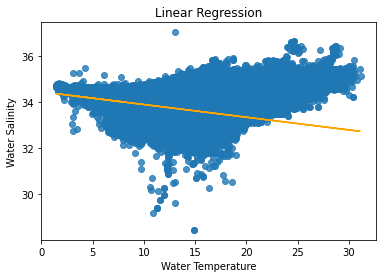

In [25]:
plt.scatter(X_train, y_train, alpha=0.8)
plt.plot(X_test, lrs.predict(X_test), c='orange')
plt.xlabel('Water Temperature')
plt.ylabel('Water Salinity')
plt.title('Linear Regression')

## sklearn linear regression

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred=lr.predict(X_test)

In [29]:
r2_score(y_test,y_pred)

0.25477292272286245

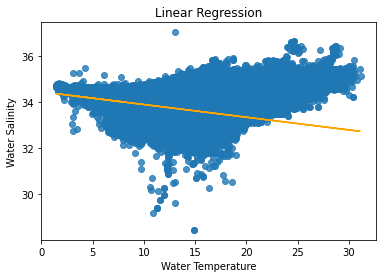

In [30]:
plt.scatter(X_train, y_train, alpha=0.8)
plt.plot(X_test, y_pred, c='orange')
plt.xlabel('Water Temperature')
plt.ylabel('Water Salinity')
plt.title('Linear Regression')
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [32]:
y_test

array([34.49 , 34.79 , 34.074, ..., 34.62 , 34.126, 34.165])

In [33]:
print(mean_absolute_error(y_test, y_pred))

0.27967867917851424


In [34]:
print(mean_squared_error(y_test, y_pred))

0.15864148514246001


In [35]:
lr.coef_

array([-0.05525689])

In [36]:
lr.intercept_

34.44113256615691

## multiple linear regression

In [37]:
X = df1[['T_degC', 'Depthm']].values
y = df1['Salnty'].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [39]:
mlr=LinearRegression()

In [40]:
mlr.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred=mlr.predict(X_test)

In [42]:
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MSE 0.13765570042462533
R2 score 0.3533547974172099


In [43]:
mlr.coef_

array([-0.02375601,  0.00063754])

In [44]:
mlr.intercept_

33.9576391092564

In [45]:
X.shape

(814247, 2)

In [46]:
y

array([33.44  , 33.44  , 33.437 , ..., 33.415 , 33.4062, 33.388 ])

## multiple linear regression scratch

In [47]:
# E = (e)T * (e)
# E = (Y-Yhat)T * (Y-Yhat)
# find such value of beta matrix for which E is min

In [48]:
class MultiLR:
    def __init(self):
        self.coef_=None
        self.intercept_=None
    def fit(self,X_train,y_train):
        X_train=np.insert(X_train,0,1,axis=1)
        
        #calculating coeffs
        betas=np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.intercept_=betas[0]
        self.coef_=betas[1:]
    def predict(self, X_test):
        y_pred=np.dot(X_test, self.coef_)+self.intercept_
        return y_pred

In [49]:
mlrs=MultiLR()

In [50]:
mlrs.fit(X_train,y_train)

In [51]:
X_train.shape

(651397, 2)

In [52]:
np.insert(X_train,0,1,axis=1).shape

(651397, 3)

In [53]:
y_pred=mlrs.predict(X_test)

In [54]:
r2_score(y_test,y_pred)

0.3533547974172089

In [55]:
mlrs.coef_

array([-0.02375601,  0.00063754])

In [56]:
mlrs.intercept_

33.957639109256576